In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Parte 1: Numpy

#### Ejercicio 1: ¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo booleano?

In [7]:
arr = np.zeros(1000, dtype=bool)
tamanio = arr.nbytes

print("El tamaño de bytes es:", tamanio)

El tamaño de bytes es: 1000


#### Ejercicio 2: Cree un array cuyos elementos sean los enteros pares en [1,100] y en orden decreciente. Muestre los 10 últimos por pantalla.

In [8]:
arr = np.arange(100,1,-2,dtype=int)
ultimos_10 = arr[-10:]
print(last_10)

NameError: name 'last_10' is not defined

#### Ejercicio 3:Dado el array 
#### 2 4 5 6
#### 0 3 7 4
#### 8 8 5 2
#### 1 5 6 1

#### Seleccione con una instrucción el subarray de elementos
#### 0 3 7 4

#### Después, seleccione el subarray de elementos
#### 2 5
#### 8 5

In [ ]:
arr = np.array([[2,4,6,8],
                [0,3,7,4],
                [8,8,5,2],
                [1,5,6,1]])
subarray1 = arr[1, :]
print(subarray1)

subarray2 = arr[[0, 2], 0:2] 
print(subarray2)


#### Ejercicio 4:Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9], obtenga la media aritmética de la diferencia (a-b).

In [ ]:
a = np.array([1, 4, 2, 7])
b = np.array([1, 3, 2, 9])
sub = (a - b)
np.mean(sub)

#### Ejercicio 5:Tengo valores de cordenadas (x, y) en las columnas del array

#### 1.33 4.5
#### 30.0 10.7
#### 70.2 0.5

#### Agregue a este array las coordenadas (37.1, -3.6). Muestre en pantalla las dimensiones del nuevo array.

In [ ]:
arr = np.array([[1.33,4.5],
                [30.0, 10.7],
                [70.2, 0.5]])
nuevascoordenadas = [37.1, -3.6]
nuevoarray = np.vstack([arr, nuevascoordenadas])
print(nuevoarray.shape)

#### Ejercicio 6:Copie el array del ejercicio anterior. Traspóngalo. Agregue ahora dos nuevos pares de coordenadas: (10.8, 3.0) y (35.8, 12.0).

In [ ]:
nuevoarray.transpose()
nuevascoordenadas2 = ([[10.8, 3.0],
                       [35.8, 12.0]])
nuevoarray2 = np.vstack([nuevoarray, nuevascoordenadas2])
print(nuevoarray2.transpose())

### Parte 2: Exploración y Minería de Datos

#### Ejercicio 1: ¿Cuántos Municipios tienen más de 100000 habitantes?

In [10]:
dataLab = pd.read_csv('NucleosPoblacion.csv')
dataframe_suma = dataLab[['Municipio', 'Poblacion']]
dataframe_suma2 = dataframe_suma.groupby(['Municipio']).sum()
dataframe_suma2 = dataframe_suma2.sort_values(by='Poblacion', ascending=False)
filtro = dataframe_suma2[dataframe_suma2['Poblacion'] > 100000]
print(filtro.index.nunique())

75


#### Ejercicio 2: Realice una gráfica de barras sobre la población de cada ciudad, ordenela de menor a mayo y responda:
#### a. ¿Cuál es la segunda ciudad más poblada?
#### b. ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?

<BarContainer object of 852 artists>

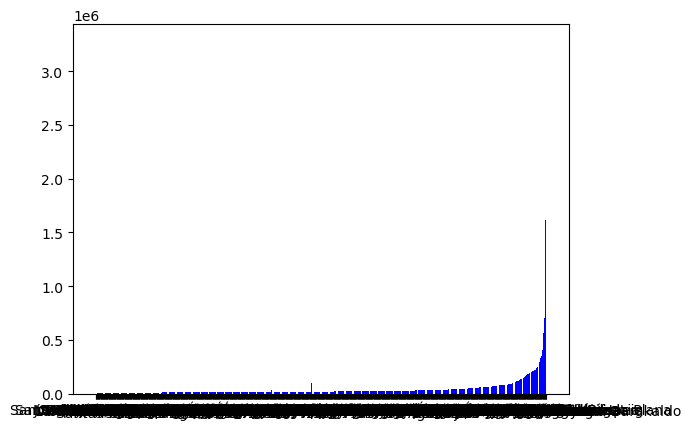

In [11]:
dataLab = dataLab.rename(columns = {'Texto':'Ciudad'})
grafica = dataLab.sort_values(by='Poblacion', ascending = True)
plt.bar(grafica['Ciudad'], grafica['Poblacion'], color = 'blue')

#### Ejercicio 3: ¿Cuántos municipios de Extremadura tienen más de 5000 habitantes?

In [29]:
municipios_extremadura = dataLab[(dataLab['Provincia'] == 'Badajoz') | (dataLab['Provincia'] == 'Cáceres')]
municipios_mas_5000_habitantes = municipios_extremadura[municipios_extremadura['Poblacion'] > 5000]
num_municipios_mas_5000_habitantes = len(municipios_mas_5000_habitantes)

print("Numero de municipios de Extremadura con mas de 5000 habitantes:", num_municipios_mas_5000_habitantes)

Numero de municipios de Extremadura con mas de 5000 habitantes: 14


#### Ejercicio 4: ¿Cuál es el municipio situado más al Norte? (Usar el valor de la coordenada "Y" que representa la latitud en grados). Proporcione también la provincia a la que pertenece y su población.

In [12]:
muni_norte = dataLab.loc[dataLab['Y'].idxmax()]
print("El municipio situado mas al Norte es",muni_norte['Municipio'])
print("Pertenece a la provincia de",muni_norte['Provincia'])
print("Su poblacion es de",muni_norte['Poblacion'],"habitantes")

El municipio situado mas al Norte es Viveiro
Pertenece a la provincia de Lugo
Su poblacion es de 16211.0 habitantes


#### Ejercicio 5: Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada.

In [13]:
grupo_granada = dataLab[dataLab['Provincia'] == 'Granada']
media_granada = grupo_granada['Poblacion'].mean()
mediana_granada = grupo_granada['Poblacion'].median()
stdev_granada = grupo_granada['Poblacion'].std()
max_granada = grupo_granada['Poblacion'].max()
min_granada = grupo_granada['Poblacion'].min()
print("Media:",media_granada)
print("Mediana:",mediana_granada)
print("Desviacion Estandar:",stdev_granada)
print("Max:",max_granada)
print("Min:",min_granada)

Media: 30217.85
Mediana: 17526.0
Desviacion Estandar: 50355.49171459277
Max: 239154.0
Min: 10386.0


#### Ejercicio 6: Realice un histograma con la población de los Municipios para cada una de las provincias.

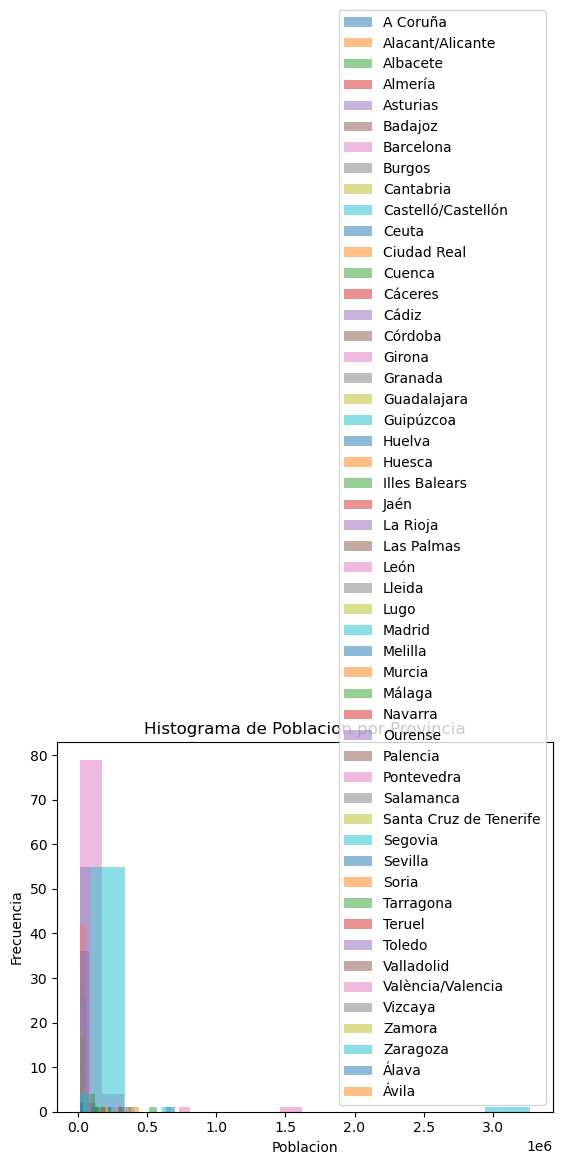

In [14]:
grupo_provincia = dataLab.groupby('Provincia')['Poblacion']

for provincia, poblacion in grupo_provincia:
    plt.hist(poblacion, bins=10, alpha=0.5, label=provincia)

plt.xlabel('Poblacion')
plt.ylabel('Frecuencia')
plt.title('Histograma de Poblacion por Provincia')
plt.legend()

plt.show()

#### Ejercicio 7: Seleccione al azar cincuenta municipios diferentes de entre los diponibles en el archivo. Asegúrese de que no se repitan. Luego calcule el promedio de la población y la desviación estándar de esto 50 municipios.

In [22]:
muestra = dataLab[['Municipio', 'Poblacion']].sample(n=50,replace=False)
media_muestra = muestra['Poblacion'].mean()
stdev_muestra = muestra['Poblacion'].std()
print("Media:",media_muestra)
print("Desviacion Estandar:",stdev_muestra)

Media: 47323.9
Desviacion Estandar: 117354.9890678375


#### Ejercicio 8: Dígame los nombres de los Municipios más cercano y más lejano a Madrid. Para ello debe calcular la distancia en todos ellos y Madrid. No considere a Madrid en el análisis ya que la distancia sería cero.

In [27]:
madrid_lat = 40.4166300011
madrid_lon = -3.703797076

Radio_tierrakm = 6371

dataLab['d'] = np.arccos(
    np.sin(np.radians(dataLab['Y'])) * np.sin(np.radians(madrid_lat)) +
    np.cos(np.radians(dataLab['Y'])) * np.cos(np.radians(madrid_lat)) *
    np.cos(np.radians(dataLab['X']) - np.radians(madrid_lon))) * Radio_tierrakm

dataLab = dataLab[dataLab['Ciudad'] != 'Madrid']

min_distance = dataLab.loc[dataLab['d'].idxmin()]
max_distance = dataLab.loc[dataLab['d'].idxmax()]

print("Municipio más cercano a Madrid:", min_distance['Ciudad'])
print("Municipio más lejano a Madrid:", max_distance['Ciudad'])


Municipio más cercano a Madrid: Humera-Somosaguas-prado del Rey
Municipio más lejano a Madrid: Los Llanos de Aridane
